https://www.kaggle.com/code/dimarudov/data-analysis-using-sql/input

This data and input for this Project was used from the above link to manipulate data with SQL & Python using jupyter notebook.

In [131]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import os

path = r"C:\Coding_local\Data Science Projects\European Soccer SQL\database.sqlite"
database = path

In [132]:
conn = sqlite3.connect(database)

In [133]:
tables = pd.read_sql("SELECT * FROM sqlite_master WHERE type='table' limit 15", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


There are 8 different tables in the database as follow.

In [134]:

sqlite_sequence = pd.read_sql("SELECT * FROM sqlite_sequence;", conn)
player_attributes = pd.read_sql("SELECT * FROM Player_Attributes;", conn)
players = pd.read_sql("SELECT * FROM Player;", conn)
matches = pd.read_sql("SELECT * FROM Match;", conn)
leagues = pd.read_sql("SELECT * FROM League;", conn)
countries = pd.read_sql("SELECT * FROM Country;", conn)
teams = pd.read_sql("SELECT * FROM Team;", conn)
team_attributes = pd.read_sql("SELECT * FROM Team_Attributes;", conn)

In [135]:
sqlite_sequence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    7 non-null      object
 1   seq     7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [136]:
player_attributes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [137]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [138]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [139]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [140]:
leagues = pd.read_sql("SELECT * FROM League INNER JOIN Country ON Country.id = League.country_id;", conn)
leagues.head(5)

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy


In [141]:
leagues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
 3   id          11 non-null     int64 
 4   name        11 non-null     object
dtypes: int64(3), object(2)
memory usage: 568.0+ bytes


In [142]:
teams = pd.read_sql("SELECT * FROM Team ORDER BY team_long_name;", conn)
teams.head(5)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29.0,1. FC Kaiserslautern,KAI
1,15624,8722,31.0,1. FC Köln,FCK
2,16239,8165,171.0,1. FC Nürnberg,NUR
3,16243,9905,169.0,1. FSV Mainz 05,MAI
4,11817,8576,614.0,AC Ajaccio,AJA


In [143]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [144]:
detailed_matches = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Spain'
                                ORDER by date
                                ;""", conn)
detailed_matches.head(5)

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0


In [145]:
detailed_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3040 non-null   int64 
 1   country_name    3040 non-null   object
 2   league_name     3040 non-null   object
 3   season          3040 non-null   object
 4   stage           3040 non-null   int64 
 5   date            3040 non-null   object
 6   home_team       3040 non-null   object
 7   away_team       3040 non-null   object
 8   home_team_goal  3040 non-null   int64 
 9   away_team_goal  3040 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 237.6+ KB


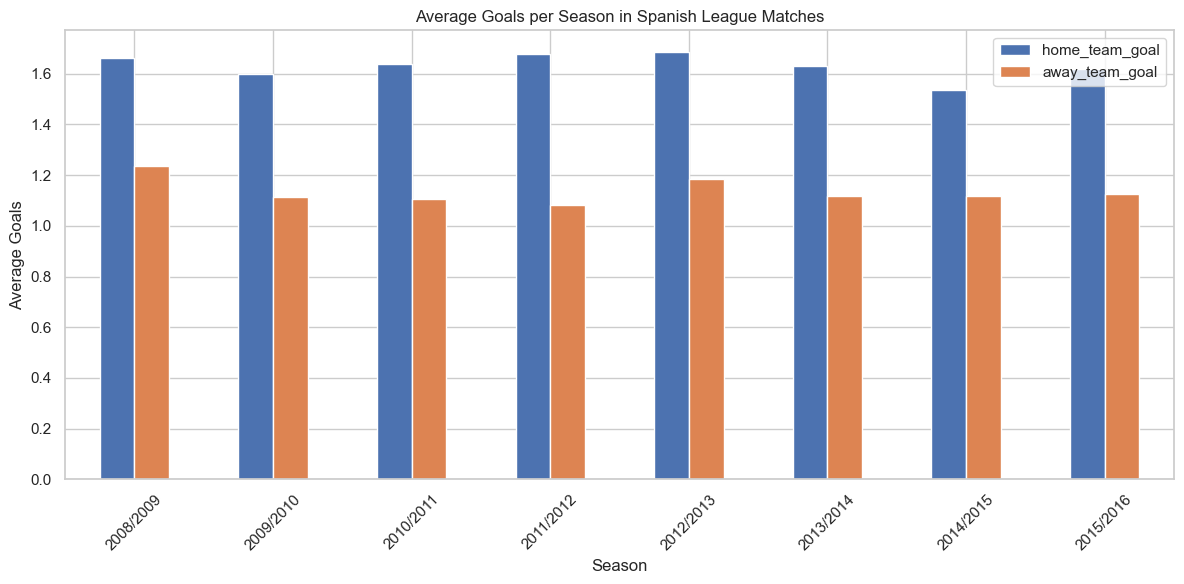

In [146]:

detailed_matches['date'] = pd.to_datetime(detailed_matches['date'])
average_goals_per_season = detailed_matches.groupby(['season'])[['home_team_goal', 'away_team_goal']].mean()
plt.figure(figsize=(12, 6))
average_goals_per_season.plot(kind='bar', ax=plt.gca())
plt.title('Average Goals per Season in Spanish League Matches')
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('average_goals_per_season.png')
plt.show()

In [147]:
leagues_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", conn)
leagues_by_season.head(5)

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066


In [148]:
leagues_by_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_name         40 non-null     object 
 1   league_name          40 non-null     object 
 2   season               40 non-null     object 
 3   number_of_stages     40 non-null     int64  
 4   number_of_teams      40 non-null     int64  
 5   avg_home_team_scors  40 non-null     float64
 6   avg_away_team_goals  40 non-null     float64
 7   avg_goal_dif         40 non-null     float64
 8   avg_goals            40 non-null     float64
 9   total_goals          40 non-null     int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 3.2+ KB


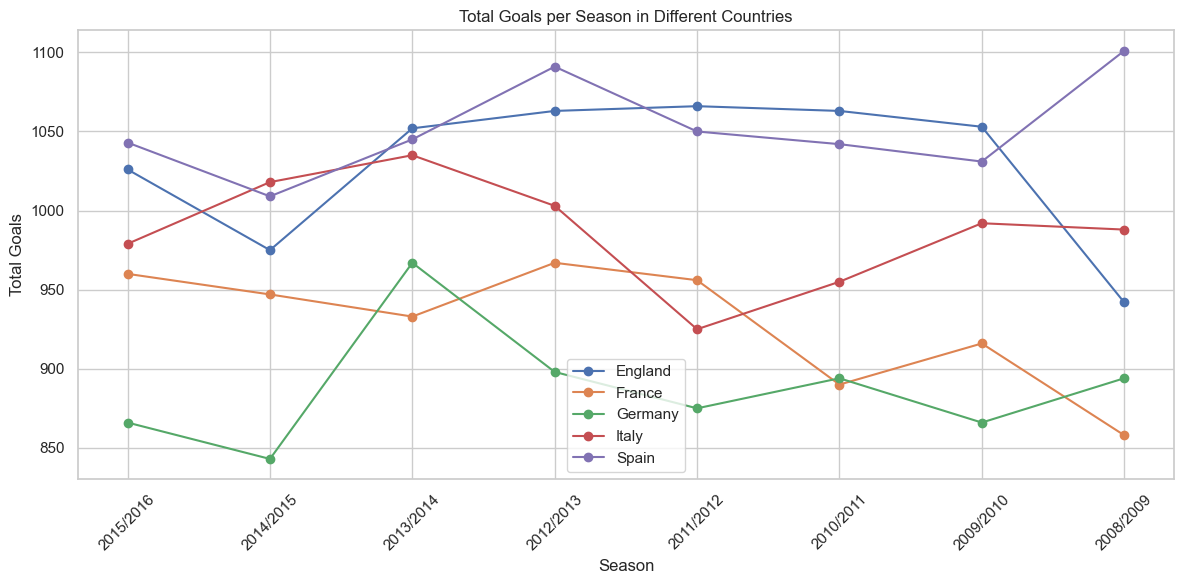

In [149]:
plt.figure(figsize=(12, 6))

for country in leagues_by_season['country_name'].unique():
    country_data = leagues_by_season[leagues_by_season['country_name'] == country]
    plt.plot(country_data['season'], country_data['total_goals'], marker='o', label=country)

plt.title('Total Goals per Season in Different Countries')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Total Goals per Season in Different Countries.png')
plt.show()

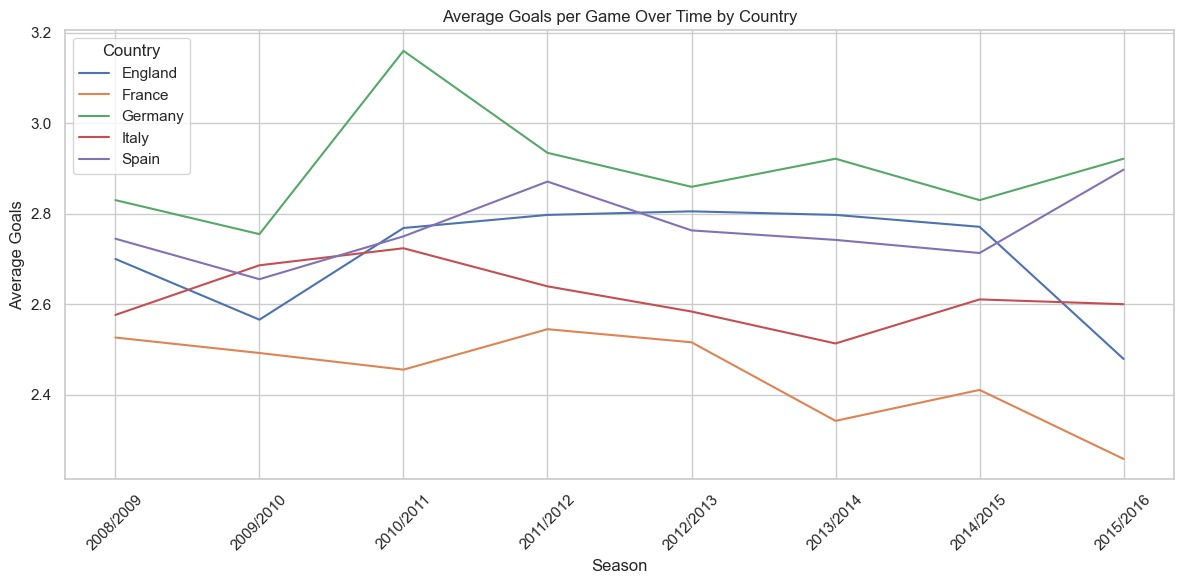

In [150]:


df = pd.DataFrame(index=np.sort(leagues_by_season['season'].unique()), 
                  columns=leagues_by_season['country_name'].unique())


countries = ['Germany', 'Spain', 'France', 'Italy', 'England']
for country in countries:
    df.loc[:, country] = list(leagues_by_season.loc[leagues_by_season['country_name'] == country, 'avg_goals'])


plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  
sns.lineplot(data=df, dashes=False) 
plt.title('Average Goals per Game Over Time by Country')
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Country')
plt.savefig('Average Goals per Game Over Time by Country.png')
plt.show()



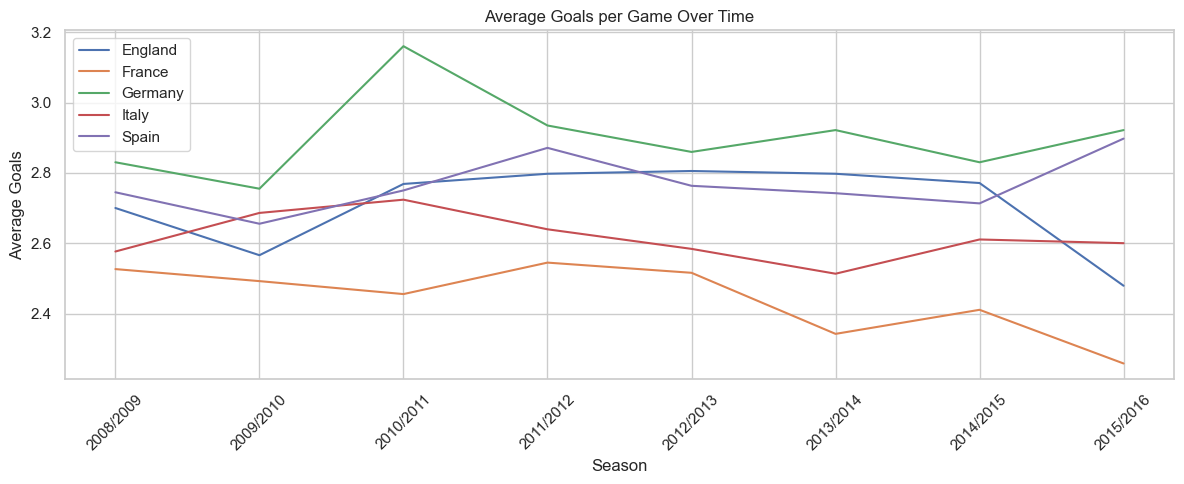

In [151]:

df = pd.DataFrame(index=np.sort(leagues_by_season['season'].unique()), 
                  columns=leagues_by_season['country_name'].unique())


countries = ['Germany', 'Spain', 'France', 'Italy', 'England']
for country in countries:
    df.loc[:, country] = list(leagues_by_season.loc[leagues_by_season['country_name'] == country, 'avg_goals'])

plt.figure(figsize=(12, 5))
sns.set(style="whitegrid")  
sns.lineplot(data=df, dashes=False)  
plt.title('Average Goals per Game Over Time')
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Average Goals per Game Over Time.png')
plt.show()



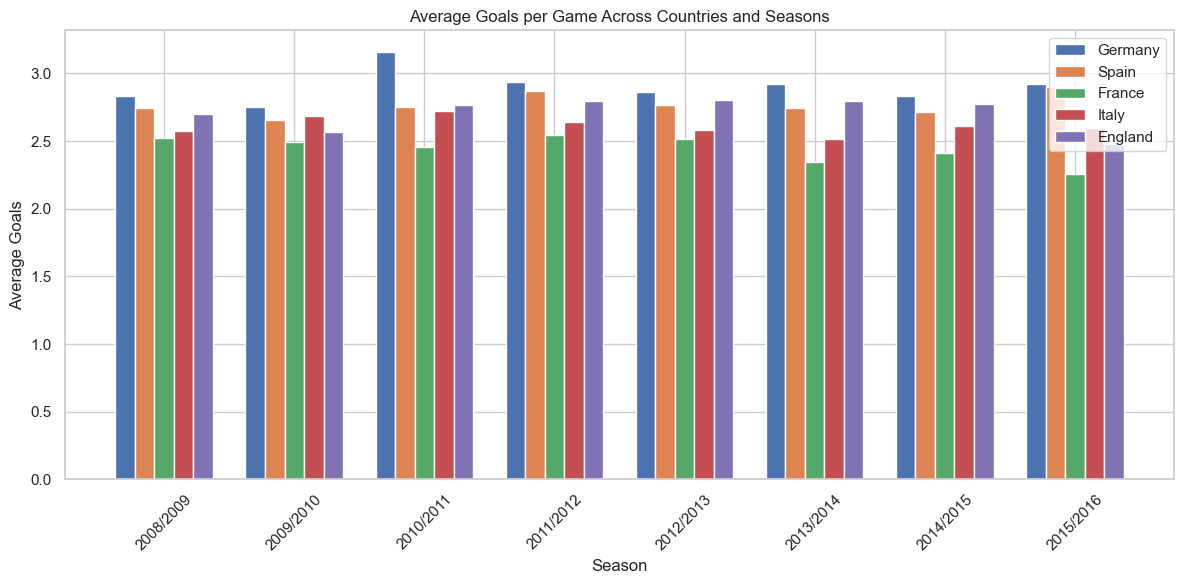

In [152]:

df = pd.DataFrame(index=np.sort(leagues_by_season['season'].unique()), 
                  columns=leagues_by_season['country_name'].unique())


countries = ['Germany', 'Spain', 'France', 'Italy', 'England']
for country in countries:
    df.loc[:, country] = list(leagues_by_season.loc[leagues_by_season['country_name'] == country, 'avg_goals'])

plt.figure(figsize=(12, 6))
bar_width = 0.15
x = np.arange(len(df.index))

for idx, country in enumerate(countries):
    plt.bar(x + (idx - 2) * bar_width, df[country], bar_width, label=country)

plt.title('Average Goals per Game Across Countries and Seasons')
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.xticks(x, df.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('Average Goals per Game Across Countries and Seasons.png')
plt.show()



<Figure size 1200x500 with 0 Axes>

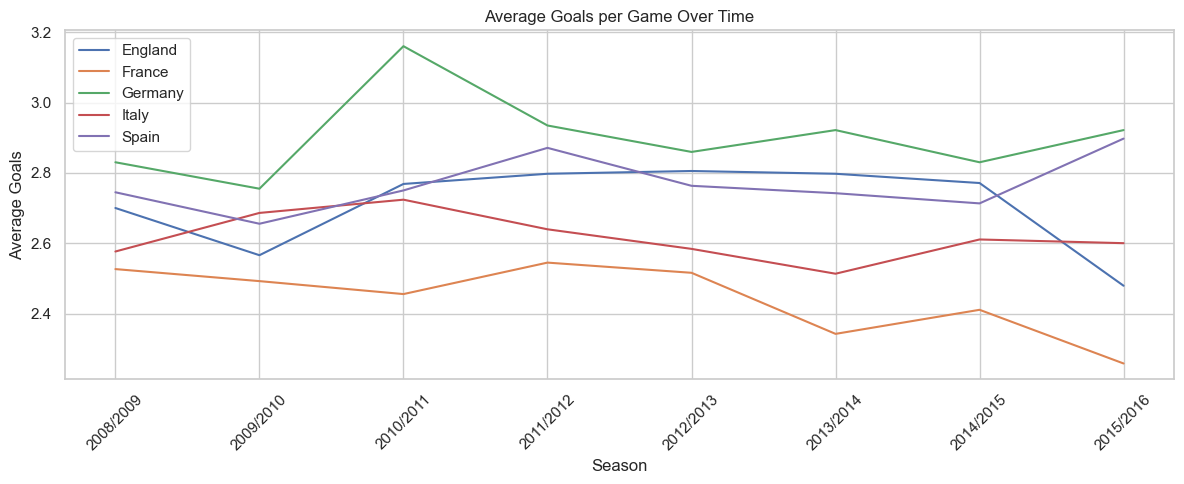

In [153]:

df = pd.DataFrame(index=np.sort(leagues_by_season['season'].unique()), 
                  columns=leagues_by_season['country_name'].unique())

df.loc[:, 'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Germany', 'avg_goals'])
df.loc[:, 'Spain'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Spain', 'avg_goals'])
df.loc[:, 'France'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'France', 'avg_goals'])
df.loc[:, 'Italy'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Italy', 'avg_goals'])
df.loc[:, 'England'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'England', 'avg_goals'])

plt.figure(figsize=(12, 5))
df.plot(figsize=(12, 5), title='Average Goals per Game Over Time')
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('average_goals_over_time.png')
plt.show()


In [154]:
players_height = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height, 
                                        COUNT(height) AS distribution, 
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight 
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height
                                ;""", conn)
players_height.head(5)

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953


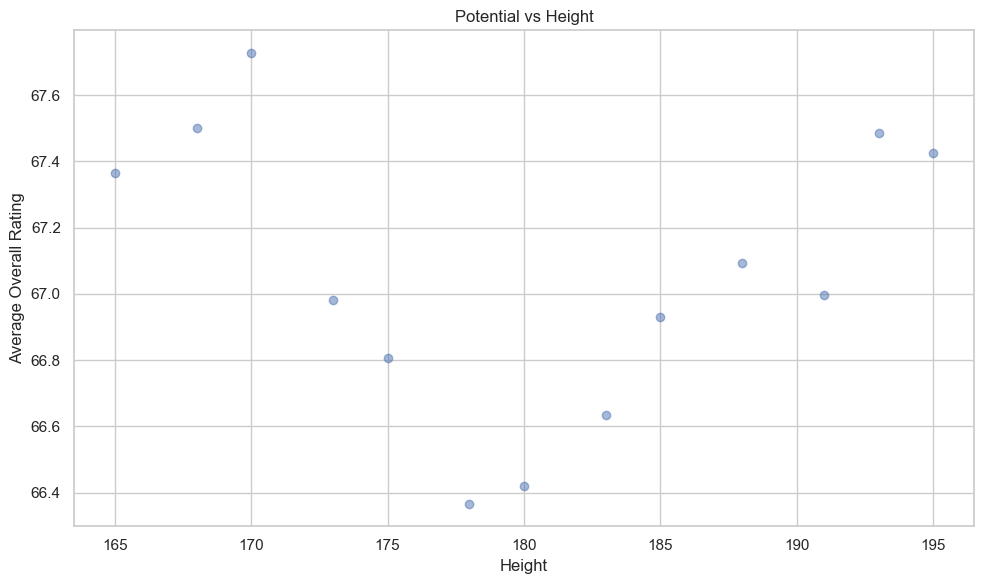

In [155]:
plt.figure(figsize=(10, 6))
plt.scatter(players_height['calc_height'], players_height['avg_overall_rating'], alpha=0.5)
plt.title('Potential vs Height')
plt.xlabel('Height')
plt.ylabel('Average Overall Rating')
plt.tight_layout()
plt.savefig('Potential vs Height.png')

plt.show()

In [156]:
conn.close()
